## Letterboxd Data exploration

The Data used in this project can be found here: https://www.kaggle.com/datasets/gsimonx37/letterboxd
It will be placed in the directory "letterboxd", that is added to the .gitignore because of file size limitations in GitHub.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re


In [2]:
#load data
actors = pd.read_csv("letterboxd/actors.csv")
countries = pd.read_csv("letterboxd/countries.csv")
crew = pd.read_csv("letterboxd/crew.csv")
genres = pd.read_csv("letterboxd/genres.csv")
movies = pd.read_csv("letterboxd/movies.csv")
languages = pd.read_csv("letterboxd/languages.csv")
releases = pd.read_csv("letterboxd/releases.csv")
studios = pd.read_csv("letterboxd/studios.csv")
themes = pd.read_csv("letterboxd/themes.csv")
actors_enriched = pd.read_csv("imdb/actors_imdb_enriched.csv")


# Actors 
Contains name of actor/actress and the corresponsing movie in the form of "id"

In [3]:
#check data
print(actors.head())

#check datatypes
print(actors.dtypes)

        id                name
0  1000001       Margot Robbie
1  1000001        Lewis Easter
2  1000001  Onyemachi Ejimofor
3  1000001     Cameron Everitt
4  1000001   Luke Field-Wright
id       int64
name    object
dtype: object


In [4]:
# check for missing values
print("missing values: " + actors.isnull().sum().astype(str))

# check for duplicates
print("duplicates: " + actors.duplicated().sum().astype(str))

# check for unique values
print("unique: " + actors.nunique().astype(str))


id      missing values: 0
name    missing values: 0
dtype: object
duplicates: 0
id       unique: 603163
name    unique: 1513888
dtype: object


In [5]:
# get top 10 actors with the most movies
top_actors = actors["name"].value_counts().head(10)
print(top_actors)

name
Mel Blanc            1049
Bess Flowers          688
Jagathy Sreekumar     633
Eric Roberts          569
Brahmanandam          569
Nassar                489
Sukumari              457
Mammootty             438
Manorama              430
Nedumudi Venu         429
Name: count, dtype: int64


In [6]:
# replace movie id with movie title in actors dataframe
#rename column name to actor
actors_with_movie_name = actors.copy().rename(columns={"name": "actor"})
actors_with_movie_name = actors_with_movie_name.merge(movies[["id", "name", "date"]], on="id", how="left")
actors_with_movie_name = actors_with_movie_name.rename(columns={"name": "movie_name"})
print(actors_with_movie_name.head())

        id               actor movie_name    date
0  1000001       Margot Robbie     Barbie  2023.0
1  1000001        Lewis Easter     Barbie  2023.0
2  1000001  Onyemachi Ejimofor     Barbie  2023.0
3  1000001     Cameron Everitt     Barbie  2023.0
4  1000001   Luke Field-Wright     Barbie  2023.0


In [7]:
# get top 10 movies with the most actors (movie names are not unique, so we will use movie id)
actors_cp = actors.copy()
top_actors_id = actors_cp["id"].value_counts()
top_actors_id = pd.DataFrame(top_actors_id)
top_actors = top_actors_id.merge(movies[["id", "name", "date"]], on="id", how="left")
print(top_actors.head(10))

        id  count                                            name    date
0  1026893    451              Bring It On: Worldwide #Cheersmack  2017.0
1  1137669    354                                        Dark Sun  1980.0
2  1001469    348                                       Malcolm X  1992.0
3  1000157    331                             The French Dispatch  2021.0
4  1007408    313                 Around the World in Eighty Days  1956.0
5  1171864    281                                Days of Betrayal  1973.0
6  1020501    258                        And the Oscar Goes to...  2014.0
7  1000840    247                                       Enchanted  2007.0
8  1264013    246                        The Liberation of Prague  1977.0
9  1300476    243  La TV des 70's : Quand Giscard était président  2022.0


In [8]:
# get the amount of movies the actors starred in
top_actors = actors["name"].value_counts()
top_actors = top_actors[top_actors > top_actors.quantile(0.8)]
print(top_actors)

# what is the average amount of movies actors starred in
average_movies = actors["name"].value_counts().mean()
print(average_movies)

# what is the median amount of movies actors starred in
median_movies = actors["name"].value_counts().median()
print(median_movies)

# what percentage of actors starred in more than 10 movies
a = actors["name"].value_counts()[actors["name"].value_counts() > 20].count()
b = actors["name"].value_counts().count()
percentage = a / b * 100
print(a)
print(b)
print(percentage)

# one html file has about 1.3 MB of data
# because we get the bio of the actors too we have to double it

size = a * 2 * 1.3
size_GB = size / 1024
print(size_GB)



name
Mel Blanc             1049
Bess Flowers           688
Jagathy Sreekumar      633
Eric Roberts           569
Brahmanandam           569
                      ... 
Homayoun Shajarian       4
Ellis Hampson            4
Massimo Vignelli         4
Giulia Pagnacco          4
Johanna Liauw            4
Name: count, Length: 264661, dtype: int64
3.6484383256885584
1.0
47010
1513888
3.1052495296877973
119.361328125


{'1-5': 85.94493119702382, '5-10': 7.011879346424571, '10-15': 2.4618730051364435, '15-20': 1.2917071804519225, '20-25': 0.7942463379061065, '25-30': 0.5317434314823818, '30-35': 0.380213067281067, '35-40': 0.2903781521486398, '40-45': 0.21910471580460378, '45-50': 0.1770936819632628, '50+': 0.8968298843771798}


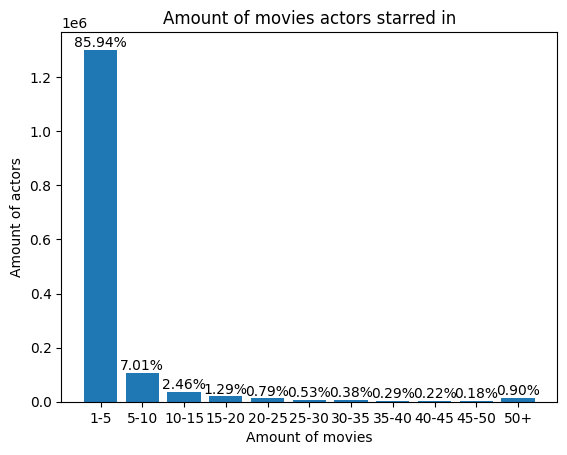

In [9]:
# bar plot of count of movies actors starred in
n1_5 = actors["name"].value_counts()[(actors["name"].value_counts() >= 1) & (actors["name"].value_counts() < 5)].count()
n5_10 = actors["name"].value_counts()[(actors["name"].value_counts() >= 5) & (actors["name"].value_counts() < 10)].count()
n10_15 = actors["name"].value_counts()[(actors["name"].value_counts() >= 10) & (actors["name"].value_counts() < 15)].count()
n15_20 = actors["name"].value_counts()[(actors["name"].value_counts() >= 15) & (actors["name"].value_counts() < 20)].count()
n20_25 = actors["name"].value_counts()[(actors["name"].value_counts() >= 20) & (actors["name"].value_counts() < 25)].count()
n25_30 = actors["name"].value_counts()[(actors["name"].value_counts() >= 25) & (actors["name"].value_counts() < 30)].count()
n30_35 = actors["name"].value_counts()[(actors["name"].value_counts() >= 30) & (actors["name"].value_counts() < 35)].count()
n35_40 = actors["name"].value_counts()[(actors["name"].value_counts() >= 35) & (actors["name"].value_counts() < 40)].count()
n40_45 = actors["name"].value_counts()[(actors["name"].value_counts() >= 40) & (actors["name"].value_counts() < 45)].count()
n45_50 = actors["name"].value_counts()[(actors["name"].value_counts() >= 45) & (actors["name"].value_counts() < 50)].count()
n50_plus = actors["name"].value_counts()[(actors["name"].value_counts() >= 50)].count()

data = {
    "1-5": n1_5,
    "5-10": n5_10,
    "10-15": n10_15,
    "15-20": n15_20,
    "20-25": n20_25,
    "25-30": n25_30,
    "30-35": n30_35,
    "35-40": n35_40,
    "40-45": n40_45,
    "45-50": n45_50,
    "50+": n50_plus
}
# also add percentages
total = actors["name"].value_counts().count()
percentages = {key: value / total * 100 for key, value in data.items()}
print(percentages)

plt.bar(data.keys(), data.values())
plt.xlabel("Amount of movies")
plt.ylabel("Amount of actors")
plt.title("Amount of movies actors starred in")
# add percentages
for key, value in percentages.items():
    plt.text(key, data[key], f"{value:.2f}%", ha="center", va="bottom")
plt.show()


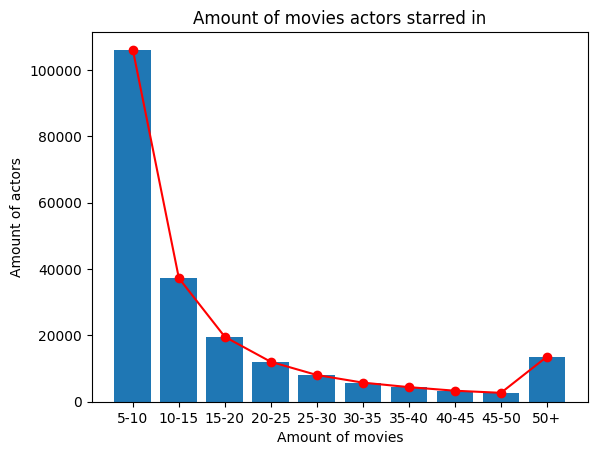

In [10]:
new_data = data.copy()
new_data.pop("1-5")
plt.bar(new_data.keys(), new_data.values())
plt.xlabel("Amount of movies")
plt.ylabel("Amount of actors")
plt.title("Amount of movies actors starred in")
# add line connecting points to show trend
plt.plot(new_data.keys(), new_data.values(), marker="o", color="r")
plt.show()


In [11]:
# we enriched the actor names with info about them from imdb
# we focused on actors with 10 or more movies starred in
# we opted for 10.000 random actors from that subset to enrich
# that all was done with the "scrape_imdb.py" and "html_parser_loop.py" scripts
# now we will check the data
# check for missing values
print("missing values: " + actors_enriched.isnull().sum().astype(str))

# check for duplicates
print("duplicates: " + actors_enriched.duplicated().sum().astype(str))

# check for unique values
print("unique: " + actors_enriched.nunique().astype(str))


nconst                  missing values: 0
primaryName             missing values: 0
birthYear               missing values: 0
deathYear               missing values: 0
primaryProfession     missing values: 136
knownForTitles          missing values: 0
gender                missing values: 645
birth_date           missing values: 3205
death_date           missing values: 6873
birth_place          missing values: 2801
death_place          missing values: 6959
death_cause          missing values: 6959
height               missing values: 6382
dtype: object
duplicates: 0
nconst               unique: 9998
primaryName          unique: 9998
birthYear             unique: 164
deathYear             unique: 107
primaryProfession     unique: 767
knownForTitles       unique: 9873
gender                  unique: 2
birth_date           unique: 6235
death_date           unique: 2946
birth_place          unique: 3414
death_place          unique: 1097
death_cause           unique: 357
height            

As you can see there are a lot of missing values that need to be explained:
- out of 10.000 actors we only have no info about 2 of them
- we dont have the birth date for about 1/3 of the actors
- we dont have the birth place for about 1/4 of the actors
- we dont have the height for about 2/3 of the actors

...but this will have to suffice, as scraping and parsing the data took a lot of time.


In [12]:
# what is the average height of male vs female actors
# remove "m" from "1.75 m" and convert to float
actors_enriched_cp = actors_enriched.copy()
actors_enriched_cp["height"] = actors_enriched_cp["height"].str.replace(" m", "").astype(float)
average_height_male = actors_enriched_cp[actors_enriched_cp["gender"] == "male"]["height"].mean()
print(f"Average height male: {average_height_male}")
average_height_female = actors_enriched_cp[actors_enriched_cp["gender"] == "female"]["height"].mean()
print(f"Average height female: {average_height_female}")

Average height male: 1.7980350378787877
Average height female: 1.657773900907188


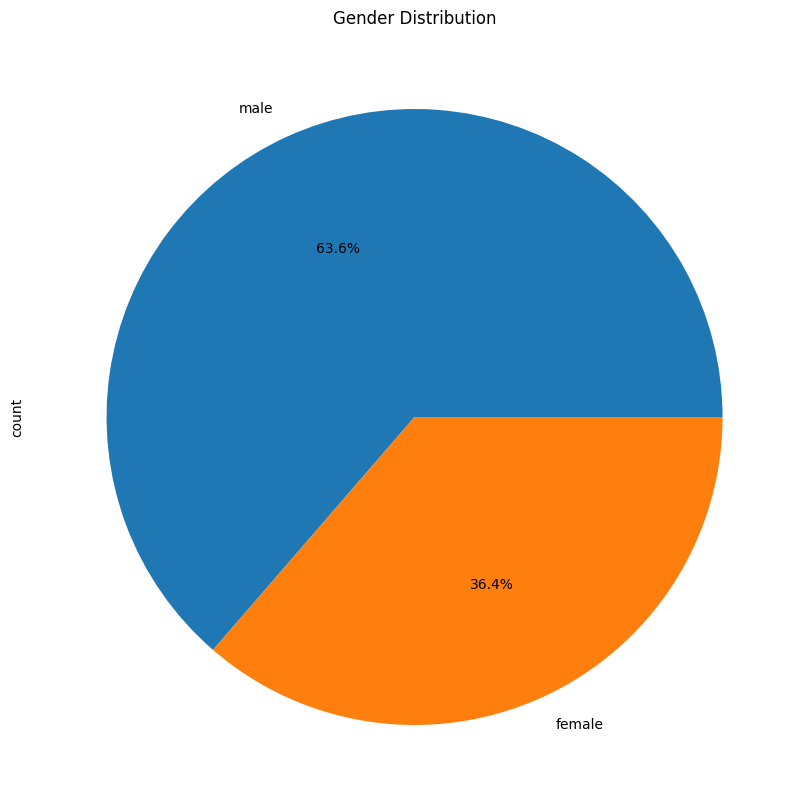

In [13]:
# we want to compare gender in the movie industry
# we will check count of actors
# show percentage in pie chart

counts = actors_enriched_cp["gender"].value_counts()
plt.figure(figsize=(10, 10))
actors_enriched_cp["gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()


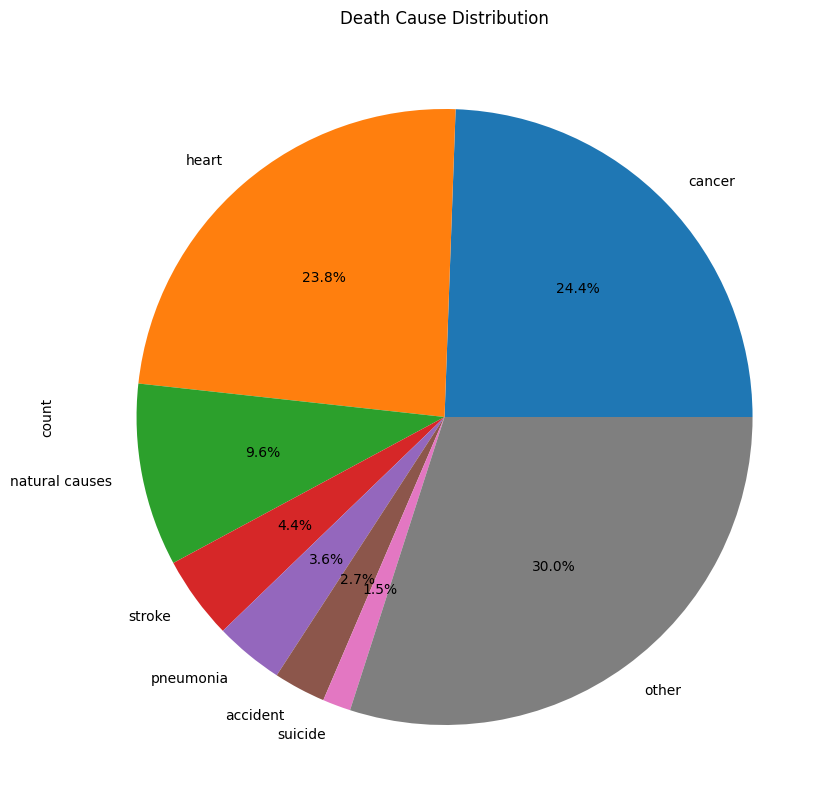

In [58]:
# get the pie chart of death causes
# we will ignore "undisclosed" and None
# we will combine all causes containing "cancer" into one category
# we will combine all causes containing "heart" into one category
# we will comine all causes containing "stroke" into one category
# we will combine all causes containing "accident" into one category
# we will only show causes with more than 30 occurences
# we will show the rest in one category called "other"
actors_enriched_cp = actors_enriched.copy()
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].str.lower()
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "cancer",regex='.*cancer.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "heart",regex='.*heart.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "heart",regex='.*cardiac.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "stroke",regex='.*stroke.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "accident",regex='.*accident.*')
counts = actors_enriched_cp["death_cause"].value_counts()
counts = counts.drop(["undisclosed"])
counts_high = pd.DataFrame(counts[counts > 15])
other = pd.DataFrame(counts[counts < 15])
other_sum = other.sum()
other_sum = pd.DataFrame(other_sum).T
other_sum.index = ["other"]
counts = pd.concat([counts_high, other_sum]).squeeze()

plt.figure(figsize=(10, 10))
counts.plot.pie(autopct="%1.1f%%")
plt.title("Death Cause Distribution")
plt.show()

In [60]:
# create wordcloud of death causes in the "other" category





0   1978-06-08
1   1989-04-13
2          NaT
3   1989-05-14
4   1980-06-12
Name: birth_date, dtype: datetime64[ns]
Max age: 145.0
Min age: 10.0


/var/folders/mm/wg5zj6k13k13vjwk3yzfpsdc0000gn/T/ipykernel_32674/3808101949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_enriched_cp_alive["age"] = (pd.Timestamp.now() - actors_enriched_cp_alive["birth_date"]).dt.days // 365


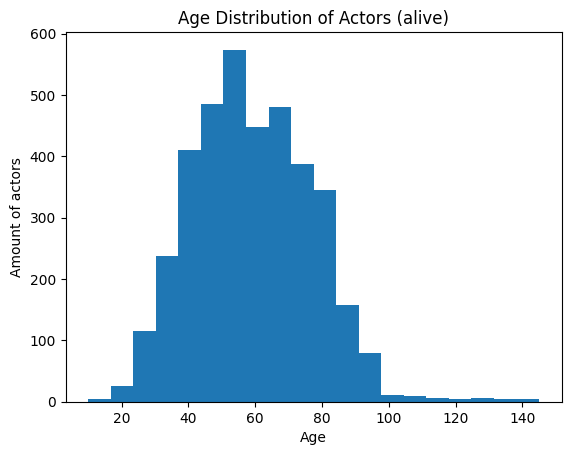

In [14]:
# get age of actors 
# convert birthdate to datetime
actors_enriched_cp["birth_date"] = pd.to_datetime(actors_enriched_cp["birth_date"])
print(actors_enriched_cp["birth_date"].head())
# get age of actors that are still alive
actors_enriched_cp_alive = actors_enriched_cp[actors_enriched_cp["deathYear"] == r'\N']
actors_enriched_cp_alive["age"] = (pd.Timestamp.now() - actors_enriched_cp_alive["birth_date"]).dt.days // 365

# max age
max_age = actors_enriched_cp_alive["age"].max()
print(f"Max age: {max_age}")
# min age
min_age = actors_enriched_cp_alive["age"].min()
print(f"Min age: {min_age}")

# plot age distribution
plt.hist(actors_enriched_cp_alive["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Amount of actors")
plt.title("Age Distribution of Actors (alive)")
plt.show()

# Countries
Contains country and the corresponsing movie in the form of "id"

In [15]:
#check data
print(countries.head())

#check datatypes
print(countries.dtypes)

        id      country
0  1000001           UK
1  1000001          USA
2  1000002  South Korea
3  1000003          USA
4  1000004      Germany
id          int64
country    object
dtype: object


In [16]:
# check for missing values
print(countries.isnull().sum())

#check for duplicates
print(countries.duplicated().sum())

#check for unique values
print(countries.nunique()) 

id         0
country    0
dtype: int64
0
id         553787
country       247
dtype: int64


In [17]:
# Get the movies with the most countries involved
# we cant just count the name of movies because the names are not unique, so we need to count the id of the movies and then merge with the movies dataframe
countries_cp = countries.copy()
top_countries_id = countries_cp["id"].value_counts()
top_countries_id = pd.DataFrame(top_countries_id)
top_countries = top_countries_id.merge(movies[["id", "name"]], on="id", how="left")
print(top_countries.head(10))


        id  count                        name
0  1183917     30        Ivory. A Crime Story
1  1111997     26     Somewhere Else Tomorrow
2  1104015     26                      Sacred
3  1037480     25           Visions of Europe
4  1185907     25               Train Station
5  1648739     23           Eye of the future
6  1109083     23                      Pelada
7  1264368     20          El cine es nuestro
8  1490261     20                    Kenopsia
9  1024853     18  Venice 70: Future Reloaded


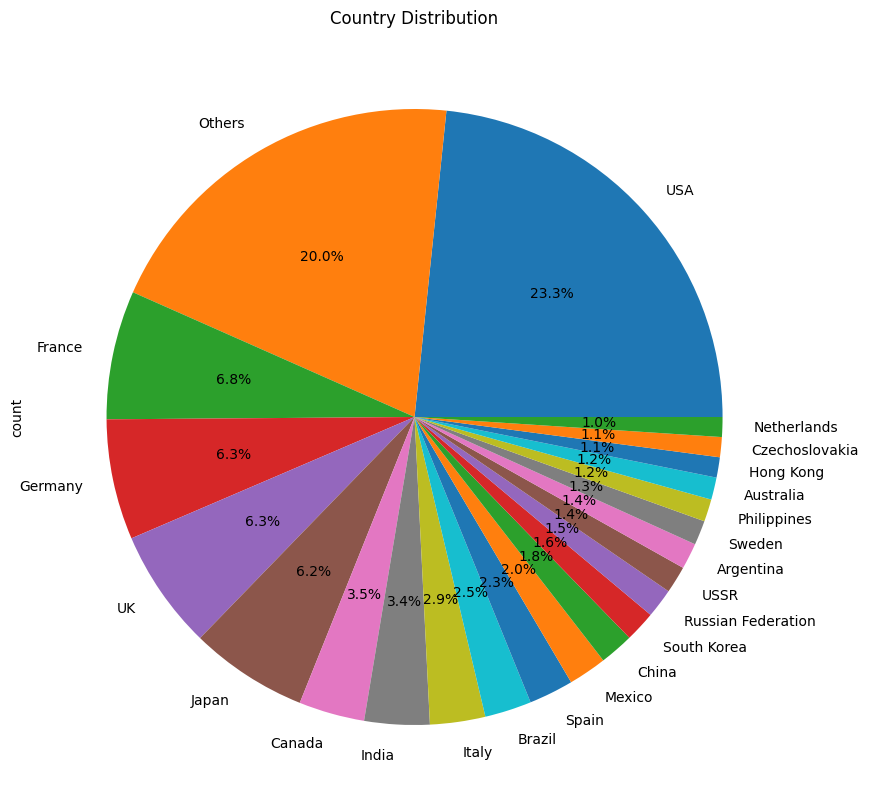

In [18]:
# show count of countries in pie chart
# combine all countries with less than 553787/100 (1%) movies into "Others"
countries_cp = countries.copy()
count = countries_cp.nunique()[0]
countries_cp_highcount = countries_cp.groupby("country").filter(lambda x: len(x) > count/100)
countries_cp_lowcount = countries_cp.groupby("country").filter(lambda x: len(x) <= count/100)
countries_cp_lowcount["country"] = "Others"
countries_cp = pd.concat([countries_cp_highcount, countries_cp_lowcount])
plt.figure(figsize=(10, 10))
countries_cp["country"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Country Distribution")
plt.show()


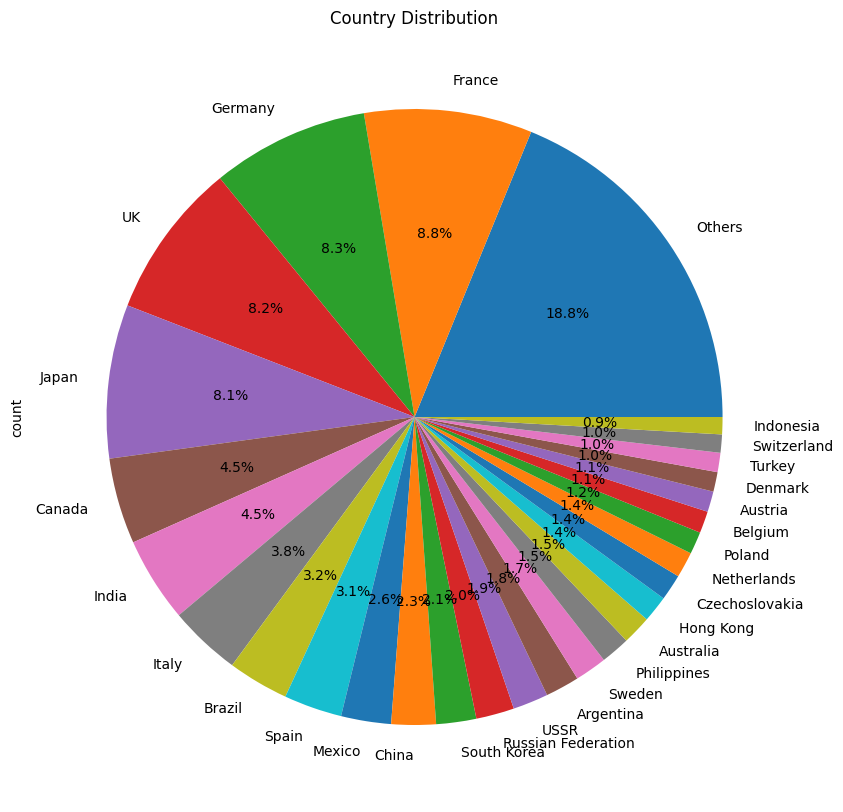

In [19]:
# USA has the most movies, so how do the percentages look like without USA?
countries_cp = countries.copy()
countries_cp = countries_cp[countries_cp["country"] != "USA"]
count = countries_cp.nunique()[0]
countries_cp_highcount = countries_cp.groupby("country").filter(lambda x: len(x) > (count/100))
countries_cp_lowcount = countries_cp.groupby("country").filter(lambda x: len(x) <= (count/100))
countries_cp_lowcount["country"] = "Others"
countries_cp = pd.concat([countries_cp_highcount, countries_cp_lowcount])
plt.figure(figsize=(10, 10))
countries_cp["country"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Country Distribution")
plt.show()

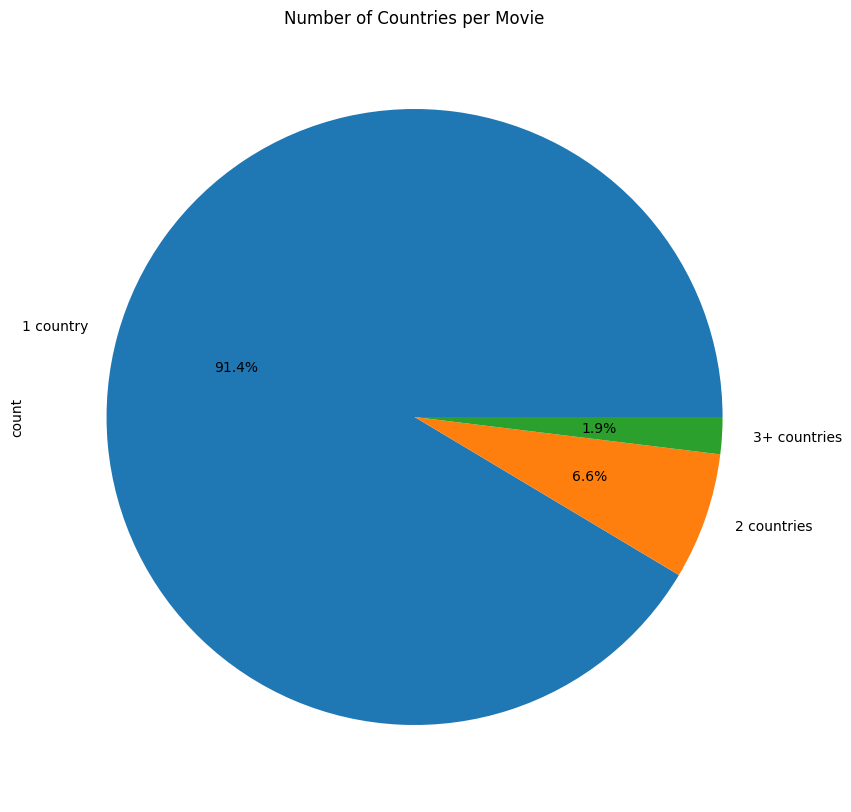

In [20]:
# movies with multiple countries
# if a movies has multiple countries, it will have multiple rows in the dataframe
# we can count the number of countries per movie and show it as a pie chart
countries_cp = countries.copy()
countries_cp_idcounts = countries_cp["id"].value_counts()
count_df = pd.DataFrame(countries_cp_idcounts)
count_df = count_df.rename(columns={"id": "count"})

# summarize the number of countries for count(id) >= 3
count_df["count"] = count_df["count"].apply(lambda x: x if x < 3 else 3)

# change df to series
countries_cp_idcounts = count_df["count"].value_counts()

# show the number of countries per movie in pie chart
# change labels to "1 country", "2 countries", "3+ countries"
plt.figure(figsize=(10, 10))
countries_cp_idcounts = countries_cp_idcounts.rename(index={1: "1 country", 2: "2 countries", 3: "3+ countries"})
countries_cp_idcounts.plot.pie(autopct="%1.1f%%")
plt.title("Number of Countries per Movie")
plt.show()
